In [137]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
import time
from datetime import datetime
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from Functions import *
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [138]:
path = '../../../KU/Bachelor+Research/Data/Piccaro/'
dates = ['07042024']

data = read_data_picarro(path, dates)
display(data)

{'07042024':             DATE          TIME  FRAC_DAYS_SINCE_JAN1  FRAC_HRS_SINCE_JAN1  \
 0     2024-04-07  16:22:16.884             97.723807          2345.371357   
 1     2024-04-07  16:22:21.381             97.723859          2345.372606   
 2     2024-04-07  16:22:25.831             97.723910          2345.373842   
 3     2024-04-07  16:22:31.108             97.723971          2345.375308   
 4     2024-04-07  16:22:35.552             97.724023          2345.376542   
 ...          ...           ...                   ...                  ...   
 1405  2024-04-07  18:13:02.082             97.800719          2347.217245   
 1406  2024-04-07  18:13:06.529             97.800770          2347.218481   
 1407  2024-04-07  18:13:11.744             97.800830          2347.219929   
 1408  2024-04-07  18:13:16.178             97.800882          2347.221161   
 1409  2024-04-07  18:13:20.605             97.800933          2347.222391   
 
         EPOCH_TIME  ALARM_STATUS  INST_STATUS  Ca

In [139]:
for i, time in enumerate(data['07042024']['TIME']):
    if '17:36:31' in time:
        print(i, time, 'leak1 start')
    if '17:46:32' in time:
        print(i, time, 'leak1 stop/lamp1 on')
    if '17:51:31' in time:
        print(i, time, 'lamp1 on')
    if '18:01:31' in time:
        print(i, time, 'lamp1 off')
    if '18:06:34' in time:
        print(i, time, 'leak2 start')
    if '18:11:32' in time:
        print(i, time, 'leak2 stop')

942 17:36:31.710 leak1 start
1069 17:46:32.996 leak1 stop/lamp1 on
1132 17:51:31.203 lamp1 on
1259 18:01:31.944 lamp1 off
1323 18:06:34.923 leak2 start
1386 18:11:32.559 leak2 stop


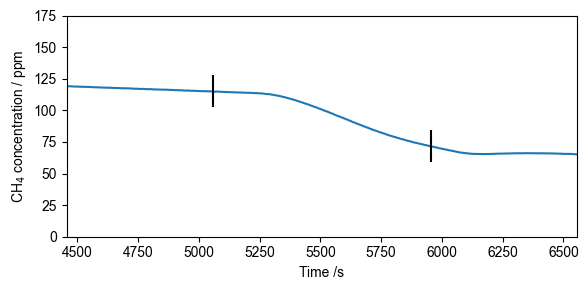

In [140]:
fig, ax = plt.subplots(figsize = (6, 3))

ax.plot(data['07042024']['Seconds'], data['07042024']['HR_12CH4'])
ax.scatter(data['07042024']['Seconds'][1069], data['07042024']['HR_12CH4'][1069], marker = '|', s = 500, color = 'k', zorder = 10)
ax.scatter(data['07042024']['Seconds'][1259], data['07042024']['HR_12CH4'][1259], marker = '|', s = 500, color = 'k', zorder = 10)

ax.set(xlim = (data['07042024']['Seconds'][942], data['07042024']['Seconds'][1386]), ylim = (0, 175),
       xlabel = 'Time /s', ylabel = 'CH$_{4}$ concentration / ppm')

# formatter = FuncFormatter(lambda s, x: time.strftime('%H:%M', time.gmtime(s)))
# ax.xaxis.set_major_formatter(formatter)

fig.tight_layout()
fig.savefig('Full_exp.jpg', dpi = 600)
plt.show()

In [141]:
idx_exp = np.array([[942, 1069, 1132, 1259, 1323, 1386]])
exp_keys = [['before 070424', 'lamp 070424', 'after 070424']]

pd.options.mode.chained_assignment = None 
exp_treat = dict_for_treatment(data, idx_exp, exp_keys)

for key in exp_keys[0]:
    exp_treat[key]['Seconds'] = exp_treat[key]['Seconds'] - data['07042024']['Seconds'][942]

display(exp_treat.keys())

dict_keys(['before 070424', 'lamp 070424', 'after 070424'])

In [142]:
a_guess = np.array([-0.005, -0.005, -0.005])
b_guess = np.zeros(3) + 100

a, b, ea, eb, Chi2, ndf, prob = fit_exp(exp_treat, a_guess, b_guess)

before 070424  Fit: a=-0.000059+-0.00002576  b=119.079+-1.059  p=1.000000
lamp 070424  Fit: a=-0.000767+-0.00002584  b=223.493+-6.988  p=1.000000
after 070424  Fit: a=-0.000030+-0.00007440  b=69.798+-10.134  p=1.000000


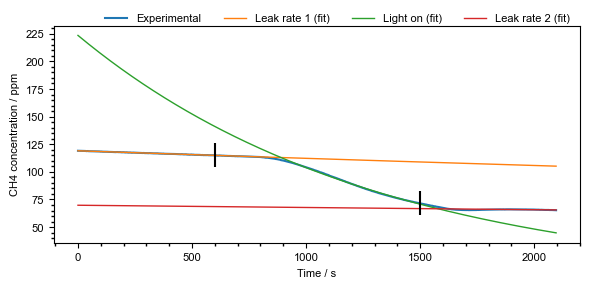

In [143]:
labels_full = ['Experimental', 'Leak rate 1 (fit)', 'Light on (fit)', 'Leak rate 2 (fit)']
fig, ax = plt.subplots(figsize = (6, 3))

plot_full_exp(ax, data['07042024'], a, b, [942, 1386], [1069, 1259])
ax.legend(labels = labels_full, frameon = False, fontsize = 8, ncol = 4, bbox_to_anchor = (1, 1.1))

fig.tight_layout()
fig.savefig('Full_exp_wFit.jpg', dpi = 600)
plt.show()

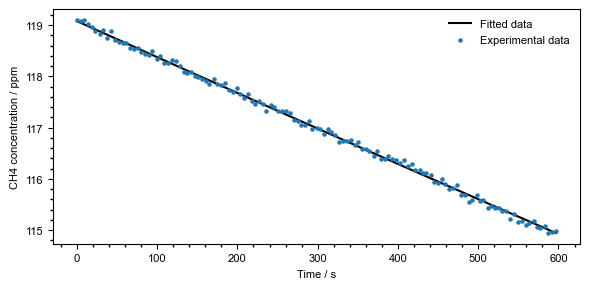

In [144]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_before_lamp(ax, exp_treat, a[0], b[0], 'before 070424')

fig.tight_layout()
fig.savefig('leak1.jpg', dpi = 600)
plt.show()

before radiation:  106.08910547415651 +- 5.411660103854399
after radiation:  65.84450056338747 +- 13.513372385033854


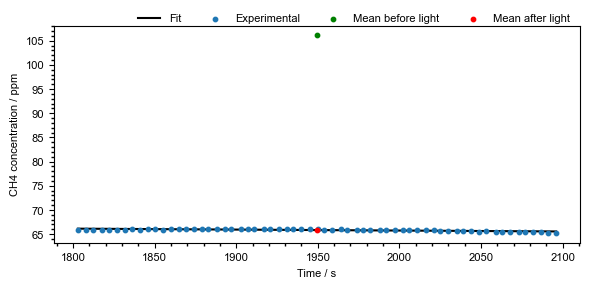

In [145]:
labels_after = ['Fit', 'Experimental', 'Mean before light', 'Mean after light']
fig, ax = plt.subplots(figsize = (6, 3))

exp1_y1, exp1_ey1, exp1_y2, exp1_ey2 = plot_mean_conc(ax, exp_treat['after 070424'], [a[0], a[2]], [b[0], b[2]], [ea[0], ea[2]], [eb[0], eb[2]])
ax.legend(labels = labels_after, frameon = False, fontsize = 8, bbox_to_anchor = (1, 1.1), ncol = 4)

fig.tight_layout()
fig.savefig('leak2.jpg', dpi = 600)
plt.show()